In [1]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Getting The CSV File For Analysis

In [2]:
df = pd.read_csv(r"C:\Users\sahil\Desktop\analytics\Machine Learning\Lgistics Regression\Invistico_Airline.csv")

In [3]:
df.info() # Checking File Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [4]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.tail()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [6]:
df.describe() # Checking the description

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.isna().sum() # Checking For Null Values

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

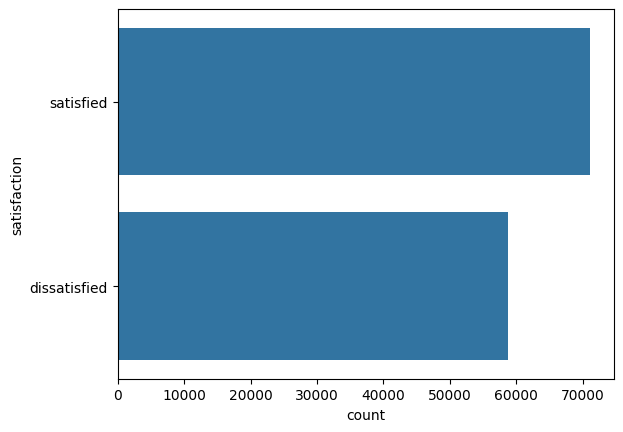

In [8]:
#Ploting the graph for visualization of satisfaction
sns.countplot(df["satisfaction"])
plt.show()

In [9]:
df["satisfaction"].value_counts() # checking no.of satisfied and disatisfied customers.

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

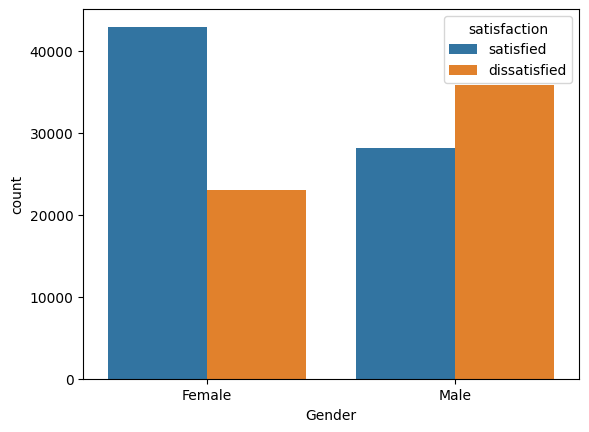

In [10]:
#Checking through comparing Gender and satisfaction
# To see how much is male and female satisfied
sns.countplot(df, x="Gender", hue="satisfaction")
plt.show()

In [11]:
df["Gender"].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [12]:
# checking the count of satisfied and disatisfied Gender.
pd.crosstab(index=df["satisfaction"], columns=df["Gender"])

Gender,Female,Male
satisfaction,,
dissatisfied,22971,35822
satisfied,42928,28159


<Axes: xlabel='Age', ylabel='Count'>

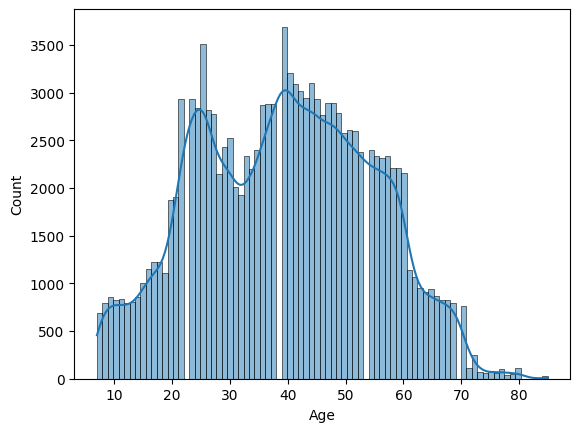

In [13]:
# Checking the distribution of Age.
# Founded Normally Distribution Data
sns.histplot(df["Age"], kde=True)

<Axes: >

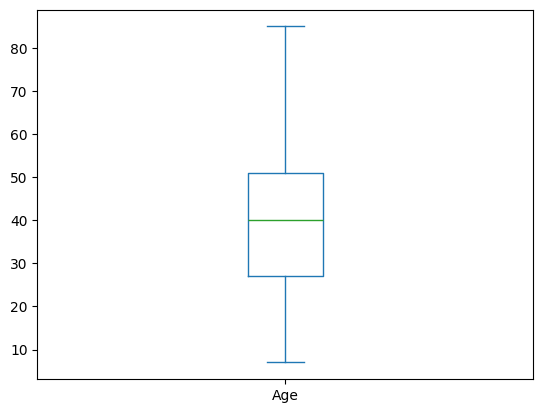

In [14]:
# Checking for the outliers in Age data.
# No such outliers found in Age Column.

df["Age"].plot.box()

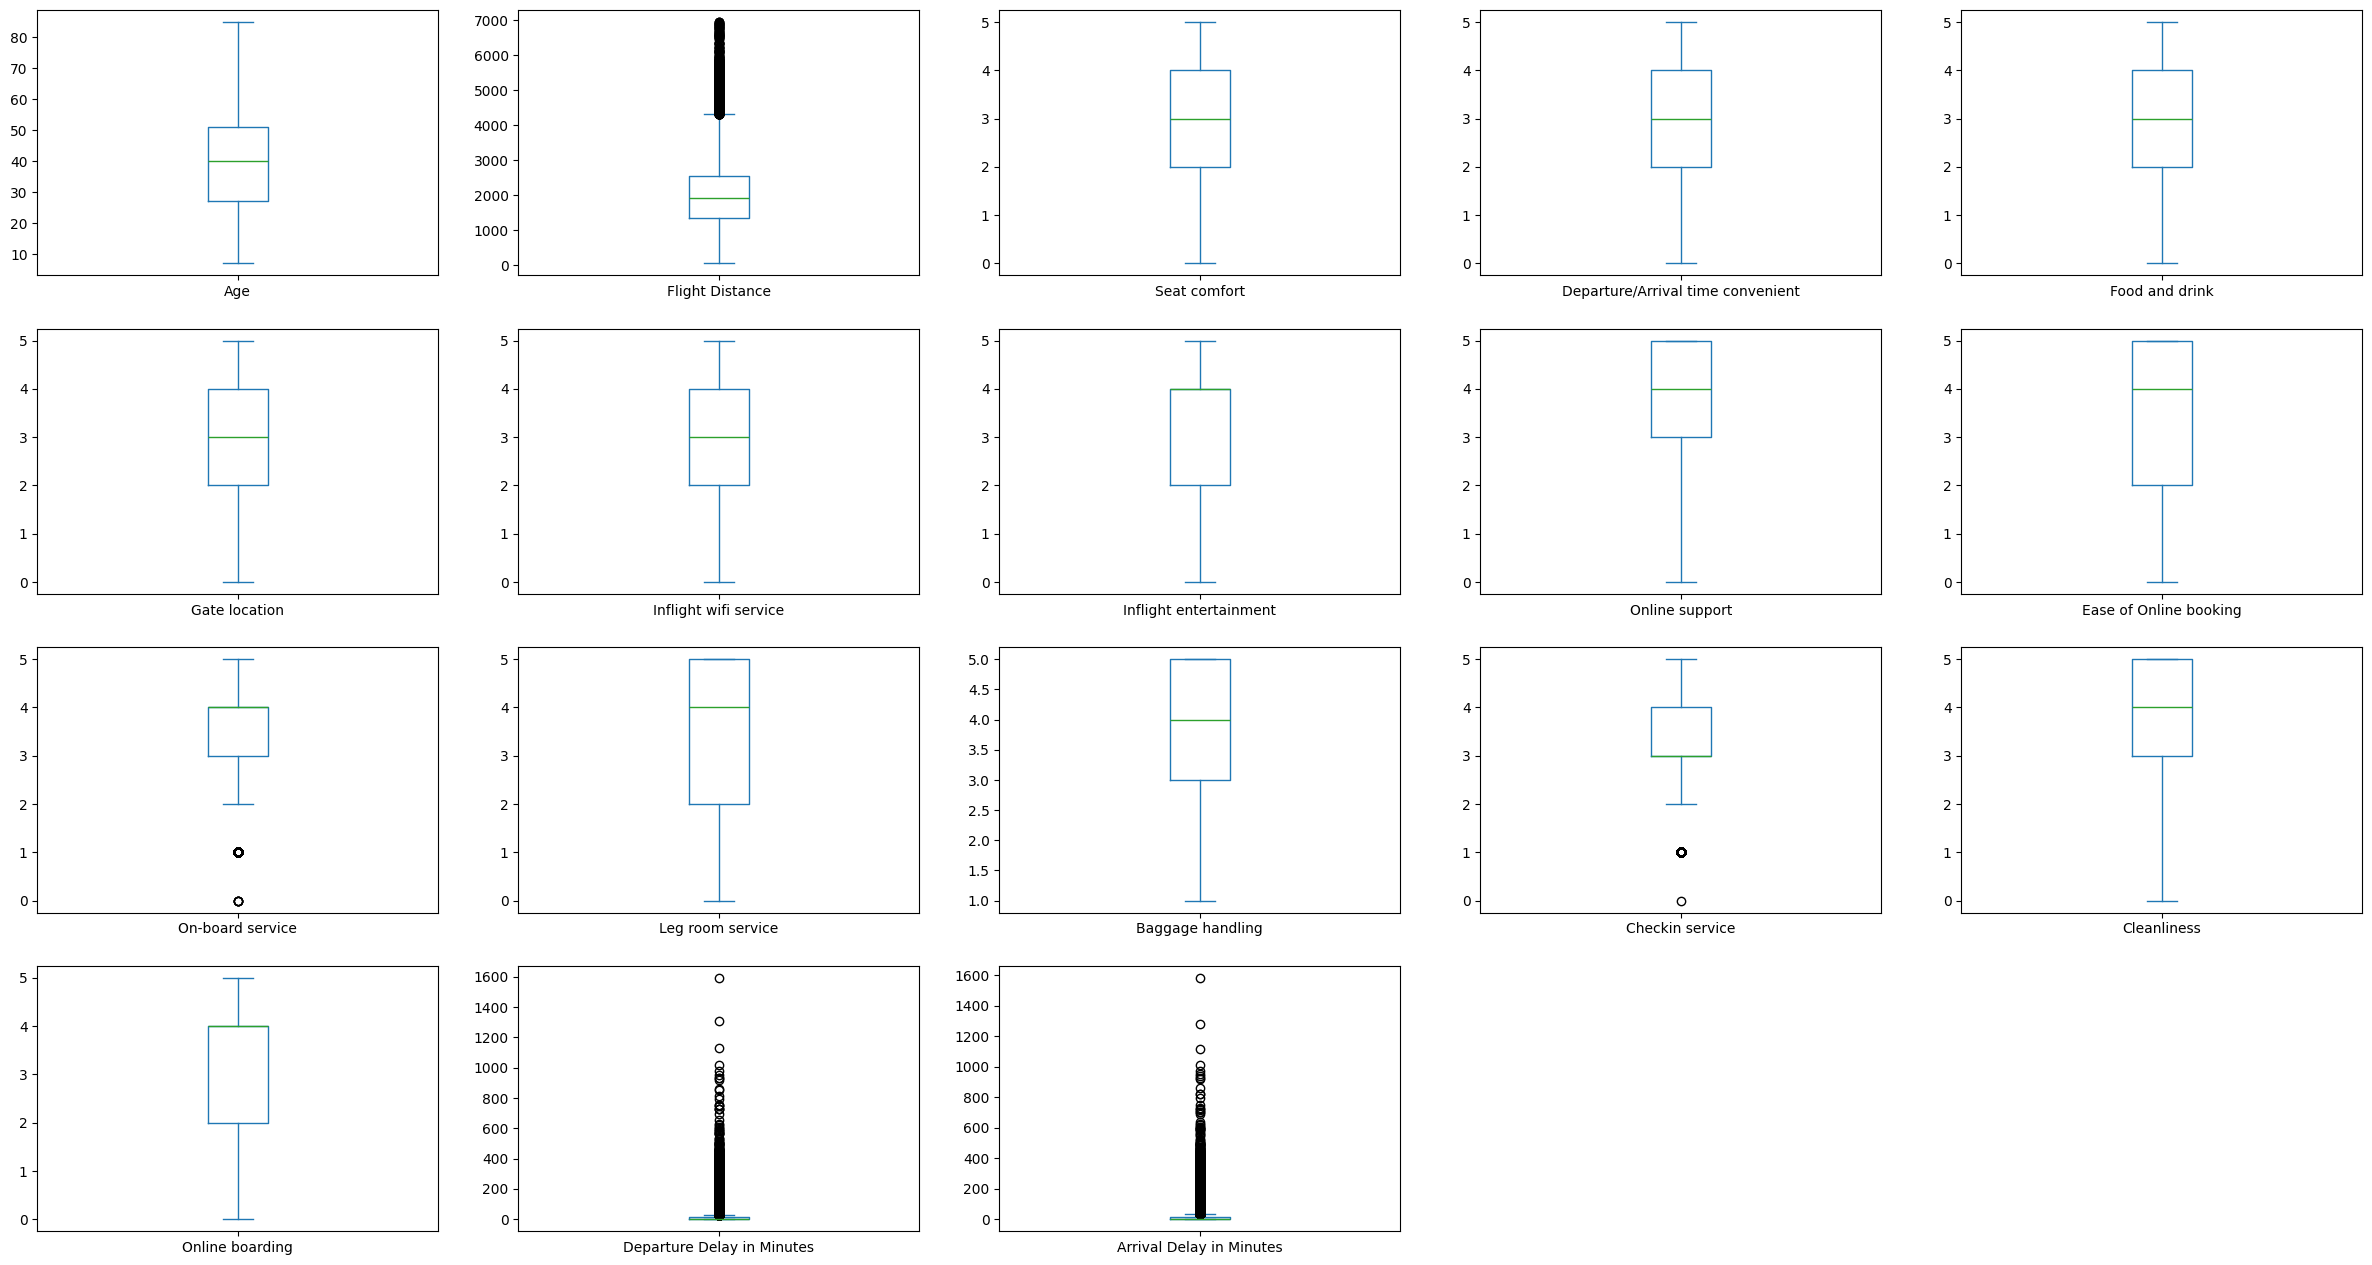

In [15]:
# Checking For all columns Outliers in data and also cecking its normal distribution or not.
df.plot(kind = "box", subplots=True,layout = (5,5), figsize = (30,20))
plt.show()

#### Comparing the Customer Type column with satisfaction and Gender.

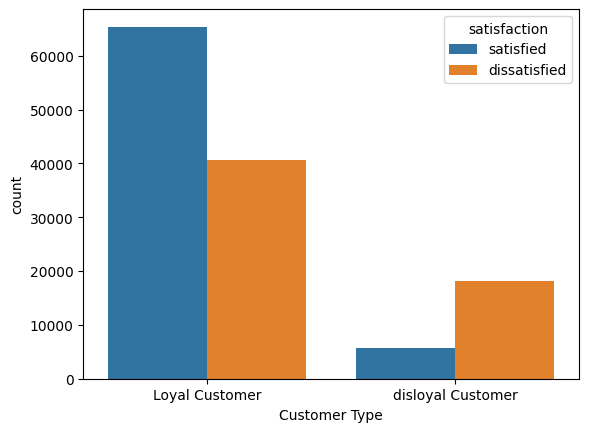

In [16]:
sns.countplot(df, x="Customer Type", hue="satisfaction")
plt.show()

<Axes: xlabel='Customer Type', ylabel='count'>

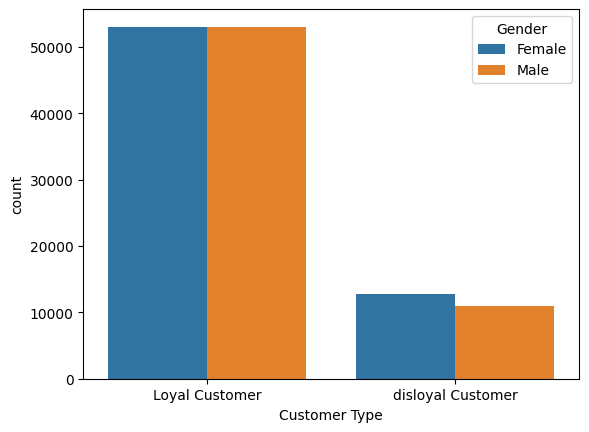

In [17]:
sns.countplot(df, x="Customer Type", hue=df["Gender"])

In [18]:
# checking the count of Loyal and Disloyal Customers by comaprison of Gender. 
pd.crosstab(index=df["Customer Type"], columns=df["Gender"])

Gender,Female,Male
Customer Type,,
Loyal Customer,53056,53044
disloyal Customer,12843,10937


#### Comparing "Type of travel" with class, Satisfaction, Gender and Customer Type Columns.

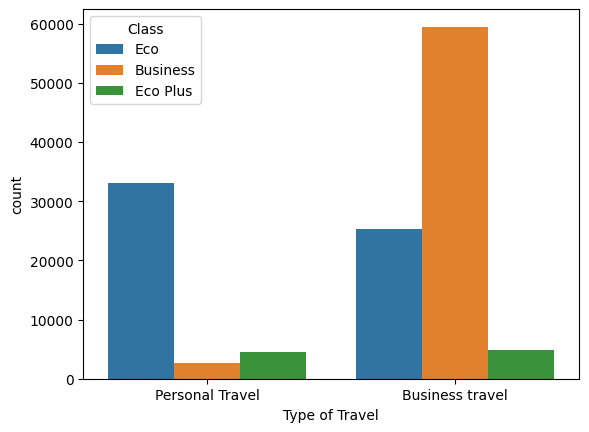

In [19]:
sns.countplot(df, x="Type of Travel", hue="Class")
plt.show()

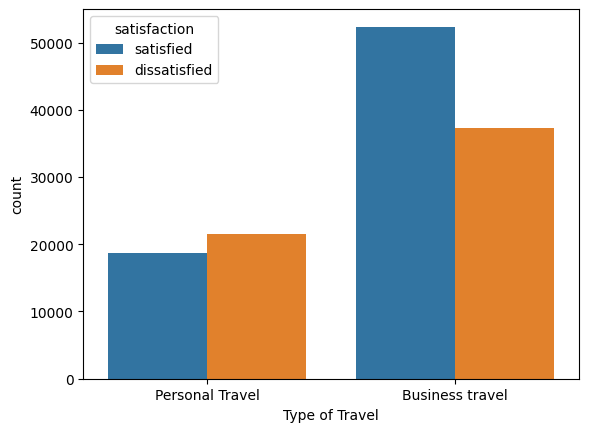

In [20]:
sns.countplot(df, x="Type of Travel", hue="satisfaction")
plt.show()

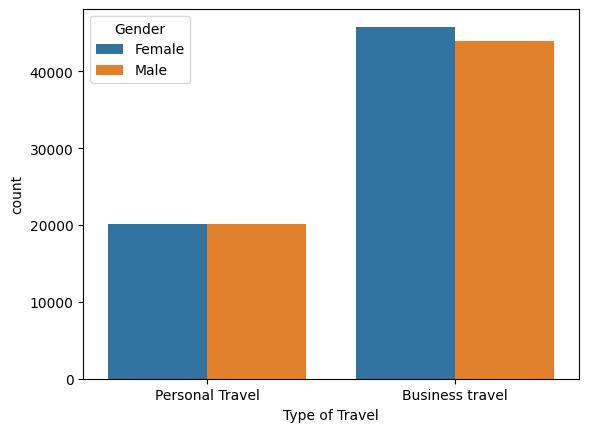

In [21]:
sns.countplot(df, x="Type of Travel", hue="Gender")
plt.show()

In [22]:
df["Type of Travel"].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

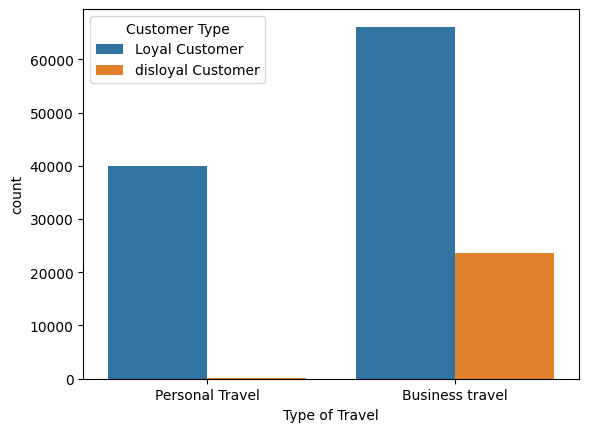

In [23]:
sns.countplot(df, x="Type of Travel", hue="Customer Type")
plt.show()

### Comparing Class with satisfaction 
#### to chcek are customers with different class satisfied or not.

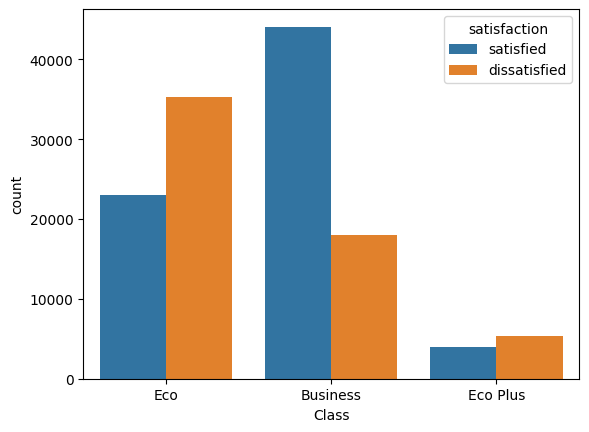

In [24]:
sns.countplot(df, x="Class", hue="satisfaction")
plt.show()


In [25]:
df["Class"].value_counts()

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

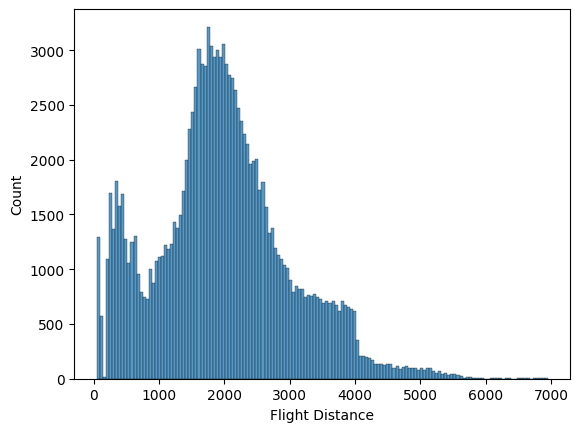

In [26]:
# Checking the distribution of the flight distance. 
sns.histplot(df["Flight Distance"])
plt.show()

<Axes: >

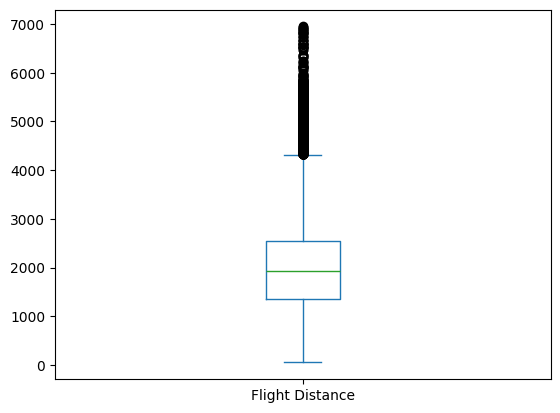

In [27]:
df["Flight Distance"].plot.box() # Checking for The Outliers in column.

#### Found The Outliers in the Data.
##### By Using Quantile have removed all the Outliers from the data.

<Axes: >

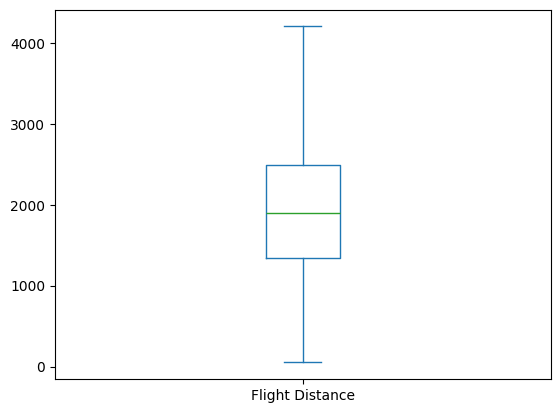

In [28]:
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]["Flight Distance"].plot.box()

In [29]:
# Checking Shape after removing the outliers.
df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]["Flight Distance"].shape

(126896,)

In [30]:
df.shape

(129880, 23)

In [31]:
df = df[df["Flight Distance"]<=df["Flight Distance"].quantile(0.977)]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126896 entries, 0 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       126896 non-null  object 
 1   Gender                             126896 non-null  object 
 2   Customer Type                      126896 non-null  object 
 3   Age                                126896 non-null  int64  
 4   Type of Travel                     126896 non-null  object 
 5   Class                              126896 non-null  object 
 6   Flight Distance                    126896 non-null  int64  
 7   Seat comfort                       126896 non-null  int64  
 8   Departure/Arrival time convenient  126896 non-null  int64  
 9   Food and drink                     126896 non-null  int64  
 10  Gate location                      126896 non-null  int64  
 11  Inflight wifi service              126896 no

In [33]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,126896.000000,126896.000000,126896.000000,126896.00000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126520.000000
mean,39.668981,1914.669737,2.840413,2.99074,2.849152,2.989606,3.242301,3.378822,3.518298,3.470787,3.470086,3.490402,3.695680,3.341997,3.708100,3.347190,14.146427,14.527924
std,15.126998,938.325817,1.394102,1.52885,1.443408,1.303912,1.319753,1.348232,1.308372,1.307125,1.269992,1.291948,1.156963,1.260086,1.151048,1.299965,36.217608,36.671598
min,7.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1337.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1901.000000,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,2489.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4204.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Comparing Seat comfort with satisfaction 

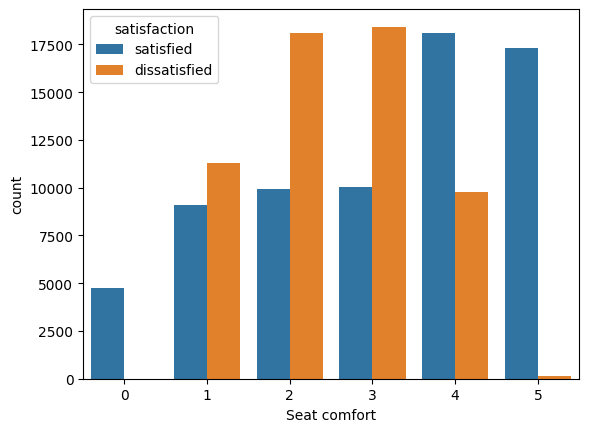

In [34]:
sns.countplot(df,x="Seat comfort", hue="satisfaction")
plt.show()

In [35]:
df["Seat comfort"].value_counts()

Seat comfort
3    28450
2    28018
4    27850
1    20391
5    17452
0     4735
Name: count, dtype: int64

#### Comparinig "Departure/Arrival time convenient" with satisfaction.

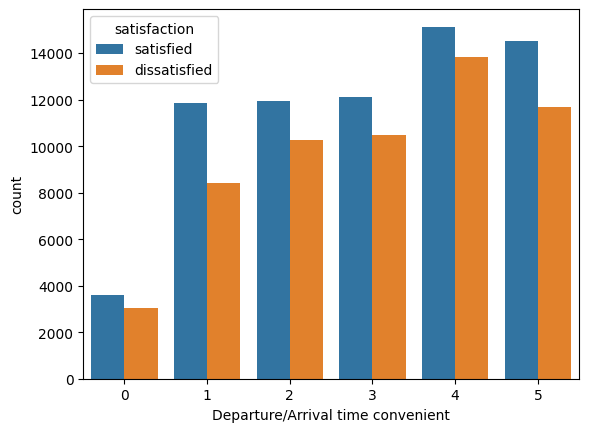

In [36]:
sns.countplot(df,x="Departure/Arrival time convenient", hue="satisfaction")
plt.show()

In [37]:
df["Departure/Arrival time convenient"].value_counts()

Departure/Arrival time convenient
4    28988
5    26210
3    22605
2    22214
1    20268
0     6611
Name: count, dtype: int64

#### Comparing "Food and drink" with satisfaction.

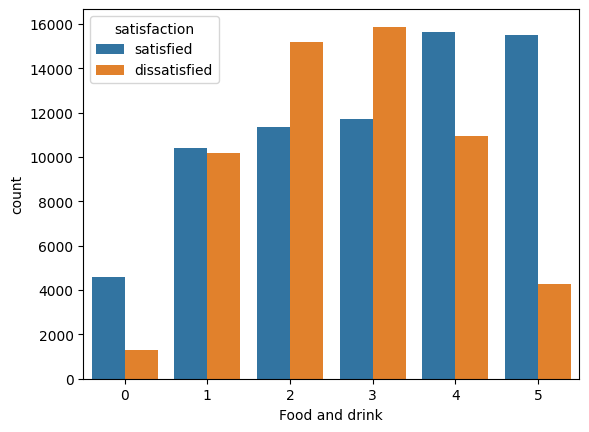

In [38]:
sns.countplot(df, x="Food and drink", hue="satisfaction")
plt.show()

In [39]:
df["Food and drink"].value_counts()

Food and drink
3    27565
4    26585
2    26550
1    20556
5    19771
0     5869
Name: count, dtype: int64

#### Comparing "Gate location" with satisfaction.

<Axes: xlabel='Gate location', ylabel='count'>

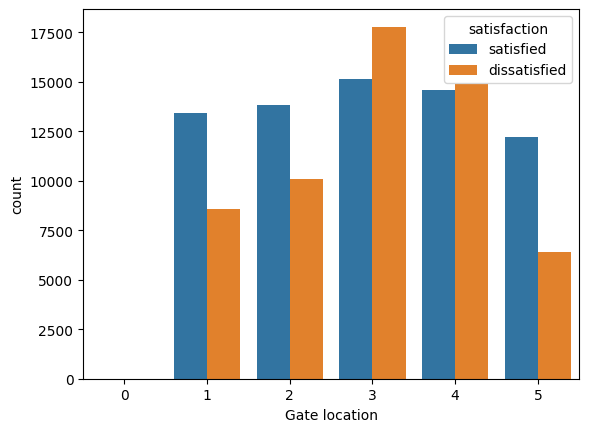

In [40]:
sns.countplot(x=df["Gate location"], hue=df["satisfaction"])

In [41]:
df["Gate location"].value_counts()

Gate location
3    32926
4    29445
2    23932
1    22002
5    18589
0        2
Name: count, dtype: int64

#### Comparinig "Inflight wifi service" with satisfaction

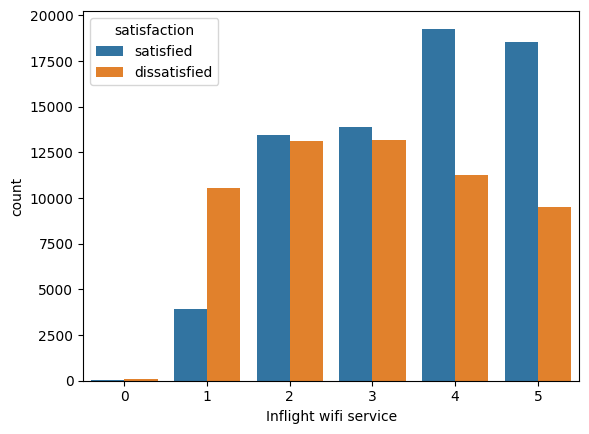

In [42]:
sns.countplot(df,x="Inflight wifi service", hue="satisfaction")
plt.show()

In [43]:
df["Inflight wifi service"].value_counts()

Inflight wifi service
4    30562
5    28064
3    27061
2    26595
1    14494
0      120
Name: count, dtype: int64

#### Comparinig "Inflight entertainment" with satisfaction

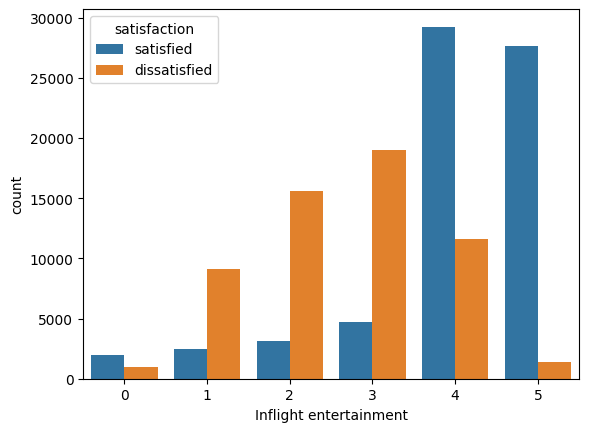

In [44]:
sns.countplot(df,x="Inflight entertainment", hue="satisfaction")
plt.show()

In [45]:
df["Inflight entertainment"].value_counts()

Inflight entertainment
4    40835
5    29045
3    23699
2    18744
1    11609
0     2964
Name: count, dtype: int64

#### Comparing "Online Support" with satisfaction.

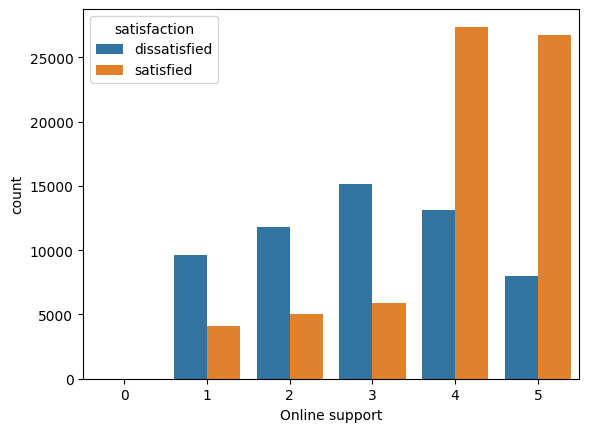

In [46]:
sns.countplot(df,x="Online support", hue="satisfaction")
plt.show()

In [47]:
df["Online support"].value_counts()

Online support
4    40491
5    34774
3    21089
2    16816
1    13725
0        1
Name: count, dtype: int64

#### Comparing "Ease of Online booking" with satisfaction

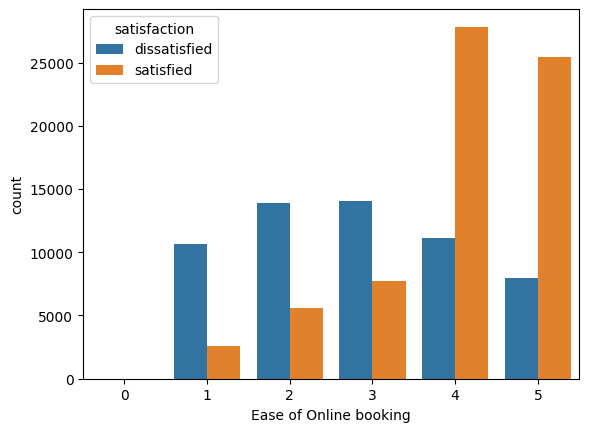

In [48]:
sns.countplot(df,x="Ease of Online booking", hue="satisfaction")
plt.show()

In [49]:
df["Ease of Online booking"].value_counts()

Ease of Online booking
4    38942
5    33383
3    21836
2    19518
1    13202
0       15
Name: count, dtype: int64

#### Comparing "On-board service" with satisfaction

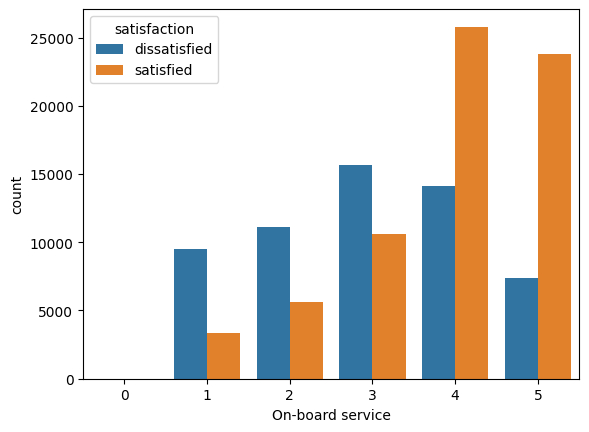

In [50]:
sns.countplot(df,x="On-board service", hue="satisfaction")
plt.show()

In [51]:
df["On-board service"].value_counts()

On-board service
4    39891
5    31133
3    26255
2    16731
1    12884
0        2
Name: count, dtype: int64

#### Comparing "Leg room service" with satisfaction

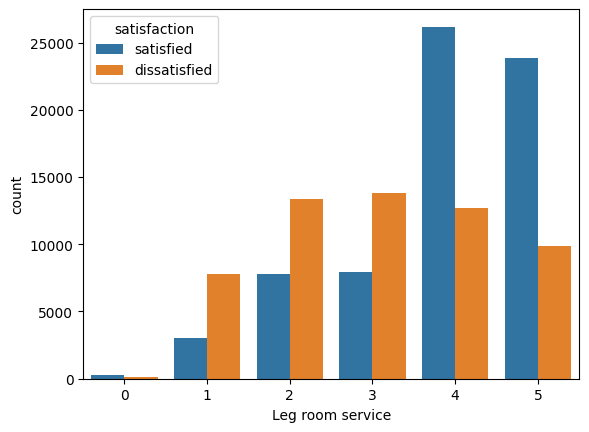

In [52]:
sns.countplot(df,x="Leg room service", hue="satisfaction")
plt.show()

In [53]:
df["Leg room service"].value_counts()

Leg room service
4    38900
5    33741
3    21812
2    21178
1    10821
0      444
Name: count, dtype: int64

#### Comparing "Baggage handling" with satisfaction

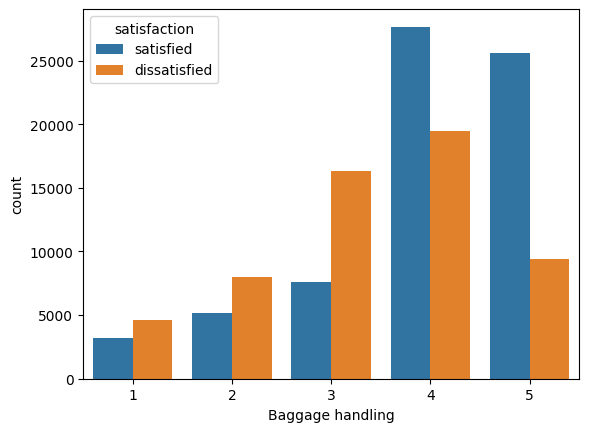

In [54]:
sns.countplot(df,x="Baggage handling", hue="satisfaction")
plt.show()

In [55]:
df["Baggage handling"].value_counts()

Baggage handling
4    47096
5    34964
3    23878
2    13171
1     7787
Name: count, dtype: int64

#### Comparing "Checkin service" with satisfaction

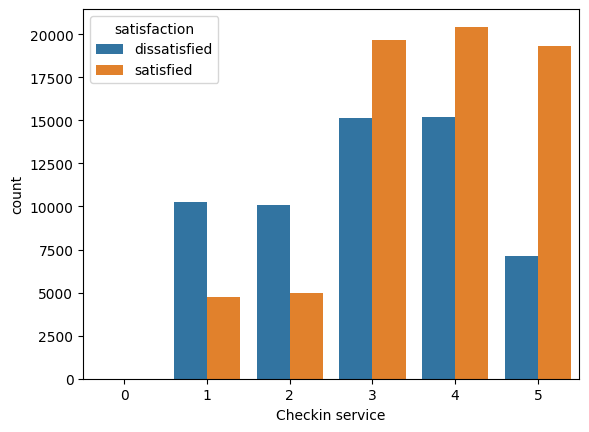

In [56]:
sns.countplot(df,x="Checkin service", hue="satisfaction")
plt.show()

In [57]:
df["Checkin service"].value_counts()

Checkin service
4    35605
3    34797
5    26424
2    15086
1    14983
0        1
Name: count, dtype: int64

#### Comparing "Cleanliness" with satisfaction

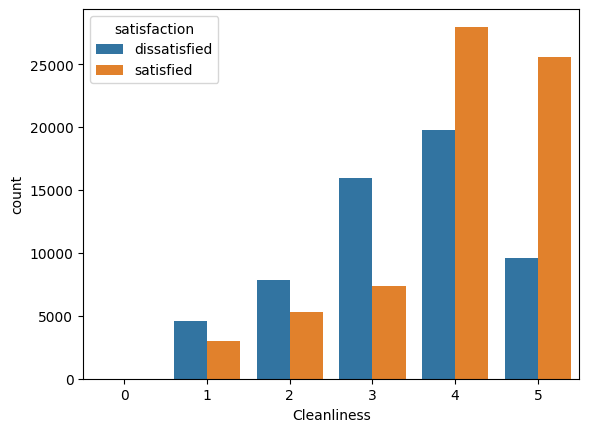

In [58]:
sns.countplot(df,x="Cleanliness", hue="satisfaction")
plt.show()

In [59]:
df["Cleanliness"].value_counts()

Cleanliness
4    47747
5    35166
3    23315
2    13114
1     7552
0        2
Name: count, dtype: int64

#### Comparing "Online boarding" with satisfaction

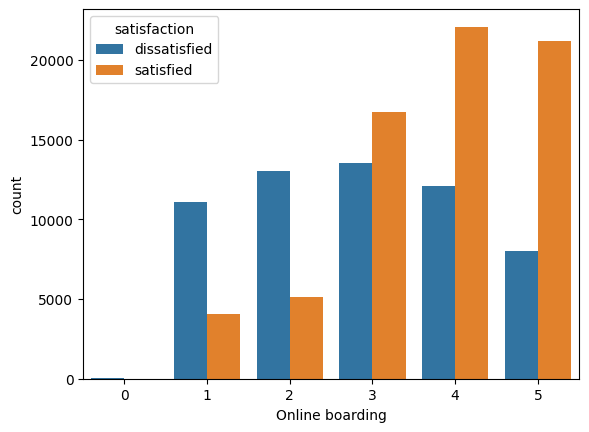

In [60]:
sns.countplot(df,x="Online boarding", hue="satisfaction")
plt.show()

In [61]:
df["Online boarding"].value_counts()

Online boarding
4    34161
3    30255
5    29183
2    18138
1    15145
0       14
Name: count, dtype: int64

#### Checking for the outliers in column

<Axes: >

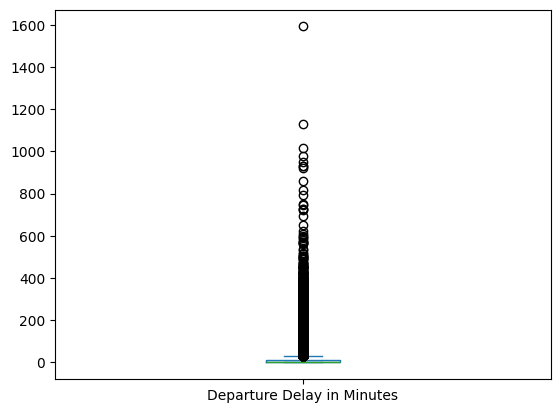

In [62]:
df["Departure Delay in Minutes"].plot.box()

#### Found the outliers in the both "Departure Delay in Minutes" and "Arrival Delay in Minutes".
#### Removed the outliers from the data using Quantile.

In [63]:
df["Departure Delay in Minutes"].quantile(0.9)

42.0

In [64]:
df["Dept_Delay"] = df["Departure Delay in Minutes"]
df["Arr_Delay"] = df["Arrival Delay in Minutes"]

In [65]:
df.drop(["Departure Delay in Minutes", "Arrival Delay in Minutes"], axis=1, inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126896 entries, 0 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       126896 non-null  object 
 1   Gender                             126896 non-null  object 
 2   Customer Type                      126896 non-null  object 
 3   Age                                126896 non-null  int64  
 4   Type of Travel                     126896 non-null  object 
 5   Class                              126896 non-null  object 
 6   Flight Distance                    126896 non-null  int64  
 7   Seat comfort                       126896 non-null  int64  
 8   Departure/Arrival time convenient  126896 non-null  int64  
 9   Food and drink                     126896 non-null  int64  
 10  Gate location                      126896 non-null  int64  
 11  Inflight wifi service              126896 no

<Axes: >

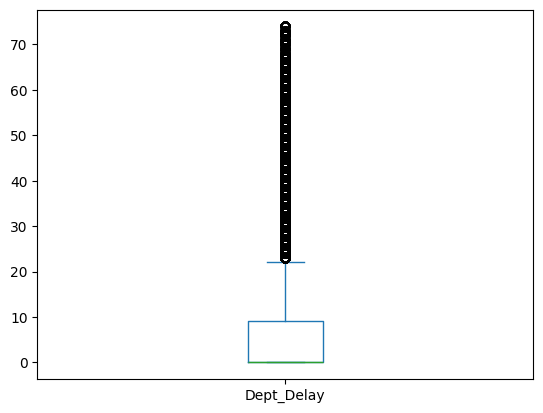

In [67]:
df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.95)]["Dept_Delay"].plot.box()

In [68]:
df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.9)]["Dept_Delay"].shape

(114220,)

In [69]:
df = df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.9)]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114220 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       114220 non-null  object 
 1   Gender                             114220 non-null  object 
 2   Customer Type                      114220 non-null  object 
 3   Age                                114220 non-null  int64  
 4   Type of Travel                     114220 non-null  object 
 5   Class                              114220 non-null  object 
 6   Flight Distance                    114220 non-null  int64  
 7   Seat comfort                       114220 non-null  int64  
 8   Departure/Arrival time convenient  114220 non-null  int64  
 9   Food and drink                     114220 non-null  int64  
 10  Gate location                      114220 non-null  int64  
 11  Inflight wifi service              114220 no

<Axes: >

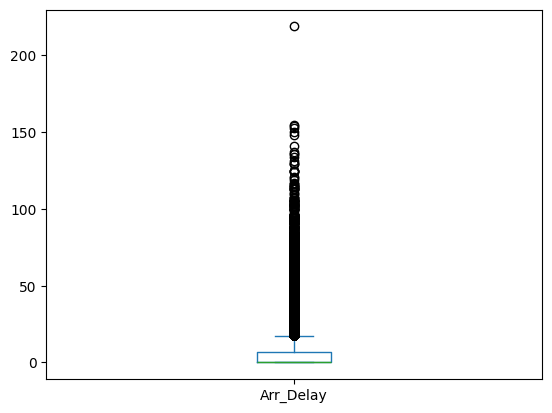

In [71]:
df["Arr_Delay"].plot.box()

<Axes: >

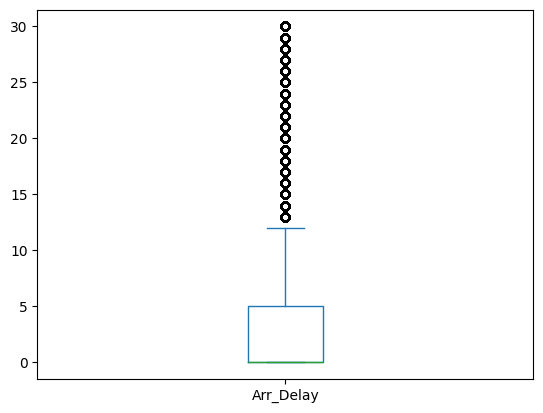

In [72]:
df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].plot.box()

In [73]:
df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].shape

(108465,)

In [74]:
df = df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108465 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       108465 non-null  object 
 1   Gender                             108465 non-null  object 
 2   Customer Type                      108465 non-null  object 
 3   Age                                108465 non-null  int64  
 4   Type of Travel                     108465 non-null  object 
 5   Class                              108465 non-null  object 
 6   Flight Distance                    108465 non-null  int64  
 7   Seat comfort                       108465 non-null  int64  
 8   Departure/Arrival time convenient  108465 non-null  int64  
 9   Food and drink                     108465 non-null  int64  
 10  Gate location                      108465 non-null  int64  
 11  Inflight wifi service              108465 no

In [76]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
dtype: int64

#### Converting The Object/ String forrmat column into integer format For further testing.

In [77]:
df["Male"]=pd.get_dummies(df["Gender"], dtype="int", drop_first=True)

In [78]:
df[["Gender", "Male"]]

,Gender,Male
0,Female,0
2,Female,0
3,Female,0
4,Female,0
5,Male,1
...,...,...
129869,Female,0
129871,Female,0
129872,Female,0
129874,Female,0


In [79]:
df.drop("Gender", axis=1, inplace=True)

In [80]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [81]:
df["Loyal_Customer"] = list(map(lambda x: 1 if x[0]=="L" else 0, df["Customer Type"]))

In [82]:
df[["Customer Type", "Loyal_Customer"]]

,Customer Type,Loyal_Customer
0,Loyal Customer,1
2,Loyal Customer,1
3,Loyal Customer,1
4,Loyal Customer,1
5,Loyal Customer,1
...,...,...
129869,disloyal Customer,0
129871,disloyal Customer,0
129872,disloyal Customer,0
129874,disloyal Customer,0


In [83]:
df.drop("Customer Type", axis=1, inplace=True)

In [84]:
df["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [85]:
df["Type of Travel"] = list(map(lambda x: 1 if x[0]=="P" else 0, df["Type of Travel"]))

In [86]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,satisfied,65,1,Eco,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,Eco,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,Eco,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,Eco,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,Eco,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [87]:
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
Male                                 0
Loyal_Customer                       0
dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le = LabelEncoder()

In [90]:
le.fit_transform(df["Class"])

array([1, 1, 1, ..., 1, 1, 1])

In [91]:
df["Class"] = le.fit_transform(df["Class"])

In [93]:
new_s=list(map(lambda x:0 if x == "satisfied" else 1,df["satisfaction"]))

In [115]:
new_s

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [94]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,satisfied,65,1,1,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,1,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,1,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,1,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,1,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [95]:
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
Male                                 0
Loyal_Customer                       0
dtype: int64

In [96]:
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=98)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
model = LogisticRegression()

In [101]:
model.fit(X_tr, y_tr)

LogisticRegression()

In [102]:
y_pred = model.predict(X_te)

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [104]:
accuracy_score(y_te, y_pred) # Testing score

0.7888409484825017

In [105]:
confusion_matrix(y_te, y_pred) # Its the confusion matrix for the data.

array([[ 8281,  3552],
       [ 2174, 13110]], dtype=int64)

In [106]:
model.score(X_tr, y_tr) # Training Score

0.784887151497271

In [107]:
print(classification_report(y_te, y_pred)) # Its the classification report of the data.

              precision    recall  f1-score   support

dissatisfied       0.79      0.70      0.74     11833
   satisfied       0.79      0.86      0.82     15284

    accuracy                           0.79     27117
   macro avg       0.79      0.78      0.78     27117
weighted avg       0.79      0.79      0.79     27117



In [108]:
from sklearn.metrics import roc_auc_score, roc_curve

In [109]:
y_pred_prob = model.predict_proba(X_te)
y_pred_prob

array([[0.41191538, 0.58808462],
       [0.0719437 , 0.9280563 ],
       [0.19529196, 0.80470804],
       ...,
       [0.55297951, 0.44702049],
       [0.41930079, 0.58069921],
       [0.11879187, 0.88120813]])

In [116]:
fpr, tpr, threshold = roc_curve(y_te, y_pred_prob[:,1],pos_label=1)

In [117]:
auc_score = roc_auc_score(y_te,y_pred_prob[:,1])

In [118]:
auc_score

0.8622065567324627

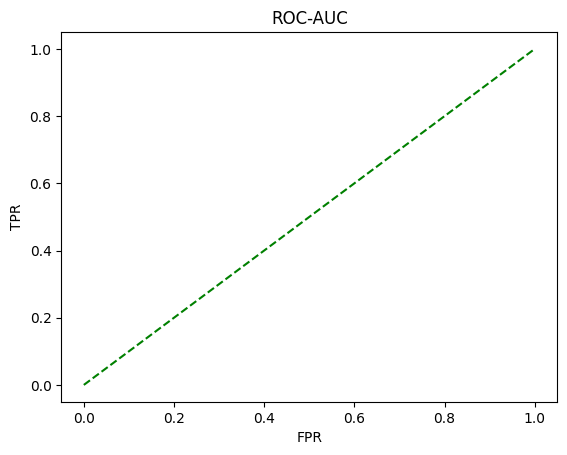

In [119]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], "g--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC")
plt.show()